In [134]:
import numpy as np
import pandas as pd
df=pd.read_csv('Cleaned Data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1.945910,01-12-2010 08:26,1.266948,9.789815,United Kingdom,2.791165
1,536365,71053,WHITE METAL LANTERN,1.945910,01-12-2010 08:26,1.479329,9.789815,United Kingdom,3.060583
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.197225,01-12-2010 08:26,1.321756,9.789815,United Kingdom,3.135494
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1.945910,01-12-2010 08:26,1.479329,9.789815,United Kingdom,3.060583
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,1.945910,01-12-2010 08:26,1.479329,9.789815,United Kingdom,3.060583


In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
sample_df=df.sample(n=5000,random_state=42)
x=sample_df[['Quantity','UnitPrice','Total']]
scaler=StandardScaler()
x=scaler.fit_transform(x)
inertia=[]
K_range=range(2, 11)
for k in K_range:
    k= KMeans(n_clusters=k, random_state=42,n_init=10)
    k.fit(x)
    inertia.append(k.inertia_)
knee=KneeLocator(K_range,inertia,curve='convex',direction='decreasing')
optimal_k=knee.knee
print(optimal_k)
final_model=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
labels=final_model.fit_predict(x)
sample_df["Cluster"]=labels
print(f'Silhouette Score: {silhouette_score(x,labels)}')

4
Silhouette Score: 0.42883663982736514


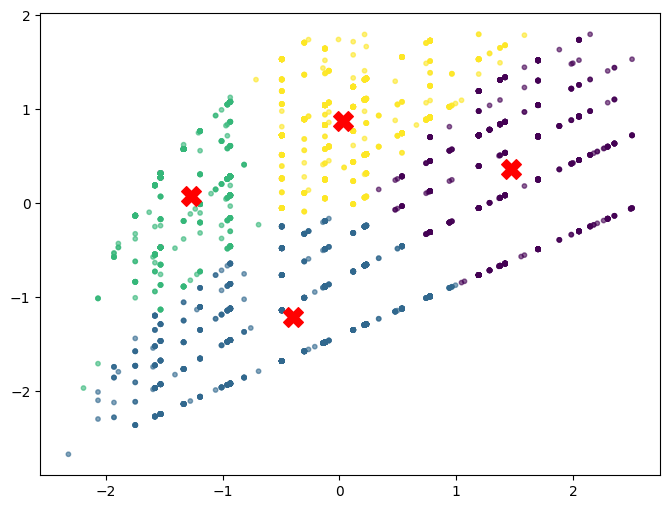

In [136]:
import matplotlib.pyplot as plt

# Scatterplot of clusters
plt.figure(figsize=(8,6))
plt.scatter(
    x[:,1],x[:,2],  # UnitPrice vs Total (scaled)
    c=labels, cmap="viridis", s=10, alpha=0.6
)

# Mark centroids
centroids = final_model.cluster_centers_
plt.scatter(
    centroids[:,1], centroids[:,2],
    c="red", marker="X", s=200, label="Centroids"
)


plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator
sample_df=df.sample(n=5000,random_state=42)
x=sample_df[['Quantity','UnitPrice','Total']].values
scaler=StandardScaler()
x=scaler.fit_transform(x)
inertia=[]
K_range=range(2,11)
for k in K_range:
    km=KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(x)
    inertia.append(km.inertia_)
knee=KneeLocator(K_range,inertia,curve='convex',direction='decreasing')
optimal_k_elbow=knee.knee
print(f"Optimal K (Elbow Method):{optimal_k_elbow}")
sil_scores=[]
for k in K_range:
    km=KMeans(n_clusters=k,random_state=42,n_init=10)
    labels=km.fit_predict(x)
    sil_scores.append(silhouette_score(x,labels))
optimal_k_silhouette=K_range[np.argmax(sil_scores)]
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")
final_model=KMeans(n_clusters=optimal_k_silhouette,random_state=42,n_init=10)
labels=final_model.fit_predict(x)
sample_df["Cluster"]=labels
print(f'Silhouette Score:{silhouette_score(x,labels)}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_score(x,labels)}')
print(f'Davies-Bouldin Index: {davies_bouldin_score(x, labels)}')
import pickle
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(final_model,f)


Optimal K (Elbow Method):4
Optimal K (Silhouette Score): 3
Silhouette Score:0.4574069879763547
Calinski-Harabasz Index: 5253.748702243054
Davies-Bouldin Index: 0.7650097088409069


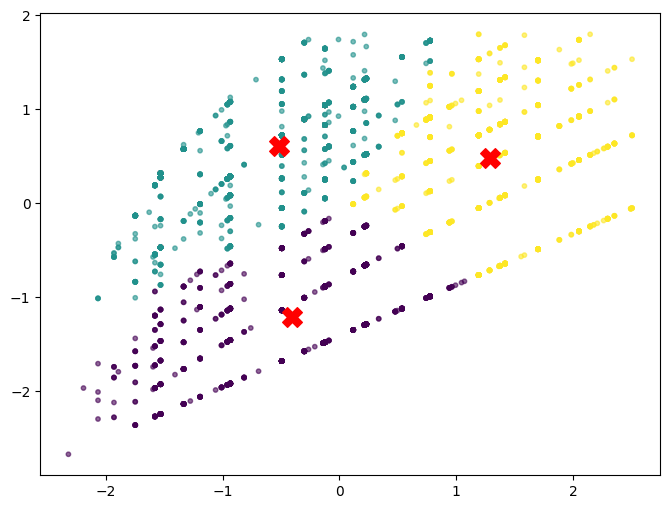

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(
    x[:,1],x[:,2],
    c=labels, cmap="viridis", s=10, alpha=0.6
)
centroids = final_model.cluster_centers_
plt.scatter(
    centroids[:,1], centroids[:,2],
    c="red", marker="X", s=200, label="Centroids"
)
plt.show()


In [139]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
agg_model = AgglomerativeClustering(n_clusters=optimal_k_silhouette)  # same K as K-Means
agg_labels = agg_model.fit_predict(x)
print(f"Silhouette Score: {silhouette_score(x, agg_labels)}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(x, agg_labels)}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(x, agg_labels)}")


Silhouette Score: 0.42213174246508195
Calinski-Harabasz Index: 4519.851976297753
Davies-Bouldin Index: 0.7971305167263053


In [140]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5,min_samples=5)
db_labels = dbscan_model.fit_predict(x)
print("DBSCAN Clustering:")
print(f"Silhouette Score: {silhouette_score(x, db_labels)}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(x, db_labels)}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(x, db_labels)}")

DBSCAN Clustering:
Silhouette Score: 0.26515101187932694
Calinski-Harabasz Index: 941.3292106352212
Davies-Bouldin Index: 0.9338736639363924
